In [18]:
import pandas as pd

In [19]:
df = pd.read_csv('Data/JPX/csv/stock_tick_202301.csv')

In [3]:
df.columns

Index(['date', 'issue code', 'isin code', 'exchange code',
       'issue classification', 'industry code',
       'securities under supervision and to be delisted flag', 'time',
       'session distinction', 'price', 'trading volume', 'transaction id'],
      dtype='object')

In [4]:
# issue_codeごとにグループ分けして，それぞれのグループでのtrading_volumeの合計を計算
vol_sum = df.groupby('issue code')['trading volume'].sum()
vol_sum.quantile([0.25, 0.5, 0.75])

0.25     115775.0
0.50     638550.0
0.75    2714075.0
Name: trading volume, dtype: float64

In [5]:

vol_sum.quantile([0.1, 0.25, 0.5, 0.75, 0.9])

0.10       24072.8
0.25      115775.0
0.50      638550.0
0.75     2714075.0
0.90    11797880.0
Name: trading volume, dtype: float64

In [20]:
# 'trading volume'が5000万以上のグループ数
vol_sum[vol_sum >= 2500_0000].count()

218

<Axes: >

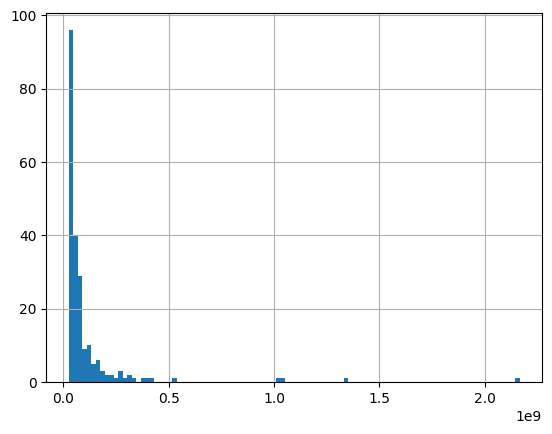

In [21]:
vol_sum[vol_sum >= 2500_0000].hist(bins=100)

In [8]:
# 'trading volume'が5000万以上のissue codeを取得
vol_sum[vol_sum >= 2500_0000].index

Index([13570, 13600, 14590, 15700, 16050, 16150, 16550, 16890, 19280, 23530,
       ...
       92010, 92270, 93180, 94320, 94330, 94340, 95010, 95030, 98310, 99840],
      dtype='int64', name='issue code', length=113)

In [22]:
out = vol_sum[vol_sum >= 2500_0000].index.to_list()
# pickleでファイルに出力
import pickle
with open('Data/issue_codes_2500_0000_over.pickle', 'wb') as f:
    pickle.dump(out, f)

In [24]:
# ロードして確認
with open('Data/issue_codes_2500_0000_over.pickle', 'rb') as f:
    out = pickle.load(f)
    print(out)

[13060, 13570, 13600, 14590, 15140, 15520, 15700, 16050, 16150, 16550, 16890, 18020, 18030, 19250, 19280, 21270, 23530, 23700, 24130, 24710, 24840, 25020, 25030, 25630, 28020, 29140, 29300, 30030, 30640, 30860, 30990, 31330, 32890, 33820, 34020, 34070, 34360, 35630, 36560, 36590, 36600, 36640, 37770, 38610, 38960, 39030, 39110, 39350, 40050, 40630, 41650, 41800, 41880, 42630, 43070, 43440, 43850, 44430, 44770, 45020, 45030, 45070, 45190, 45230, 45280, 45360, 45410, 45430, 45630, 45680, 45750, 45830, 45860, 45910, 45940, 45970, 46120, 46800, 46890, 47510, 47550, 49020, 49110, 50200, 51080, 51290, 51370, 52020, 52400, 52430, 52460, 53340, 54010, 54060, 54080, 54110, 57130, 57260, 57270, 58020, 58030, 58310, 59860, 60980, 61780, 61810, 63010, 63260, 64710, 64720, 64790, 65010, 65030, 65060, 65260, 65320, 65940, 66190, 66320, 67230, 67240, 67400, 67520, 67530, 67580, 67620, 67700, 68570, 68900, 69020, 69200, 69760, 69810, 70110, 70120, 71670, 71800, 71820, 71840, 71860, 72010, 72020, 72030

In [25]:
df = df[df['issue code'].isin(out)]

In [26]:
import gc
gc.collect()

779

In [27]:
df.shape

(18081106, 12)

In [14]:
df.columns

Index(['date', 'issue code', 'isin code', 'exchange code',
       'issue classification', 'industry code',
       'securities under supervision and to be delisted flag', 'time',
       'session distinction', 'price', 'trading volume', 'transaction id'],
      dtype='object')

In [28]:
# date, issue code, time, price, trading volume列のみを抽出
df = df[['date', 'issue code', 'time', 'price', 'trading volume']]
df.shape

(18081106, 5)

In [29]:
gc.collect()

0

In [30]:
df.to_parquet('Data/Filtered/202301.parquet', index=False)